# Graph/Network Mining


Mark Sageman studied the lives of some terrorists who belong to the Hamburg Cell (which was behind the 9/11 attacks). He found the most common factor driving them was the social ties within their cell. He created an analysis which consisted of social ties among terrorists. 

Data location: /dsa/data/DSA-8410/graph/9_11

1. File 1: 9_11_edgelist.txt
1. File 2: 9_11_attrib.txt 

The edgelist datas has the following format: 

```
Hani Hanjour,Rayed Mohammed Abdullah,5,1
Majed Moqed,Hani Hanjour,5,1
Nawaf Alhazmi,Hani Hanjour,5,1
Nawaf Alhazmi,Salem Alhazmi,5,1
Nawaf Alhazmi,Khalid Al-Mihdhar,5,1
Nawaf Alhazmi,Hamza Alghamdi,5,1
```

The data is not 100% complete and accurate. The first two columns denote the persons who are connected and the following number signifies the strength of the connection(5=strong connection, 1=weak connection); and the last column denotes level to which the connection has been verified by the government officials (1 = confirmed, 3 = possible and unconfirmed connections ). We are not going to consider the last two columns in our analysis.




### Environment Setup

In [1]:
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt

import numpy as np
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
from networkx.algorithms.community.lukes import lukes_partitioning

%matplotlib inline

### Read the file containing the analysis

In [2]:
df = pd.read_csv('/dsa/data/DSA-8410/graph/9_11/9_11_edgelist.txt', header=None)

In [3]:
df.head()

,0,1,2,3
0,Hani Hanjour,Majed Moqed,5,1
1,Hani Hanjour,Nawaf Alhazmi,5,1
2,Hani Hanjour,Khalid Al-Mihdhar,5,1
3,Hani Hanjour,Lotfi Raissi,5,1
4,Hani Hanjour,Bandar Alhazmi,5,1


### T1. Create the network 

In [4]:
g=nx.Graph()

for indx, row in df.iterrows():
    g.add_edge(row[0], row[1], weight=row[2], conf=row[3])

### T2. Show the number of nodes and edges in the network

In [5]:
g.number_of_nodes()  # number of nodes

69

In [6]:
g.number_of_edges()  # num of edges

159

### T3. Show min, max, and avg degress for this network

In [7]:
deg = g.degree()

In [8]:
min(deg, key=lambda x: x[1]) # min degree

('Mohamed Abdi', 1)

In [9]:
max(deg, key=lambda x: x[1]) # max degree

('Mohamed Atta', 22)

In [10]:
avg_degree = sum([d for n, d in deg]) / g.number_of_nodes()
avg_degree

4.608695652173913

### T4. Show a degree distrbution plot. Print top-3 nodes in terms of degree.

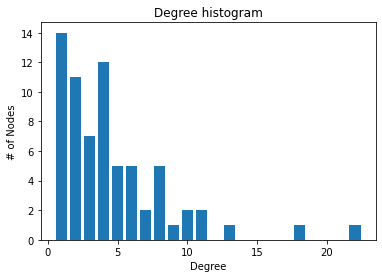

In [11]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes");

In [12]:
sorted_degrees = sorted(deg, key=lambda x: x[1], reverse=True)
sorted_degrees[:5]  # top 2 nodes in terms of degrees

[('Mohamed Atta', 22),
 ('Marwan Al-Shehhi', 18),
 ('Hani Hanjour', 13),
 ('Nawaf Alhazmi', 11),
 ('Essid Sami Ben Khemais', 11)]

### T5. Visualize the network with spring layout

In [13]:
options = {
    "font_size": 10,
    "node_size": 300,
    "node_color": "red",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 3,
}

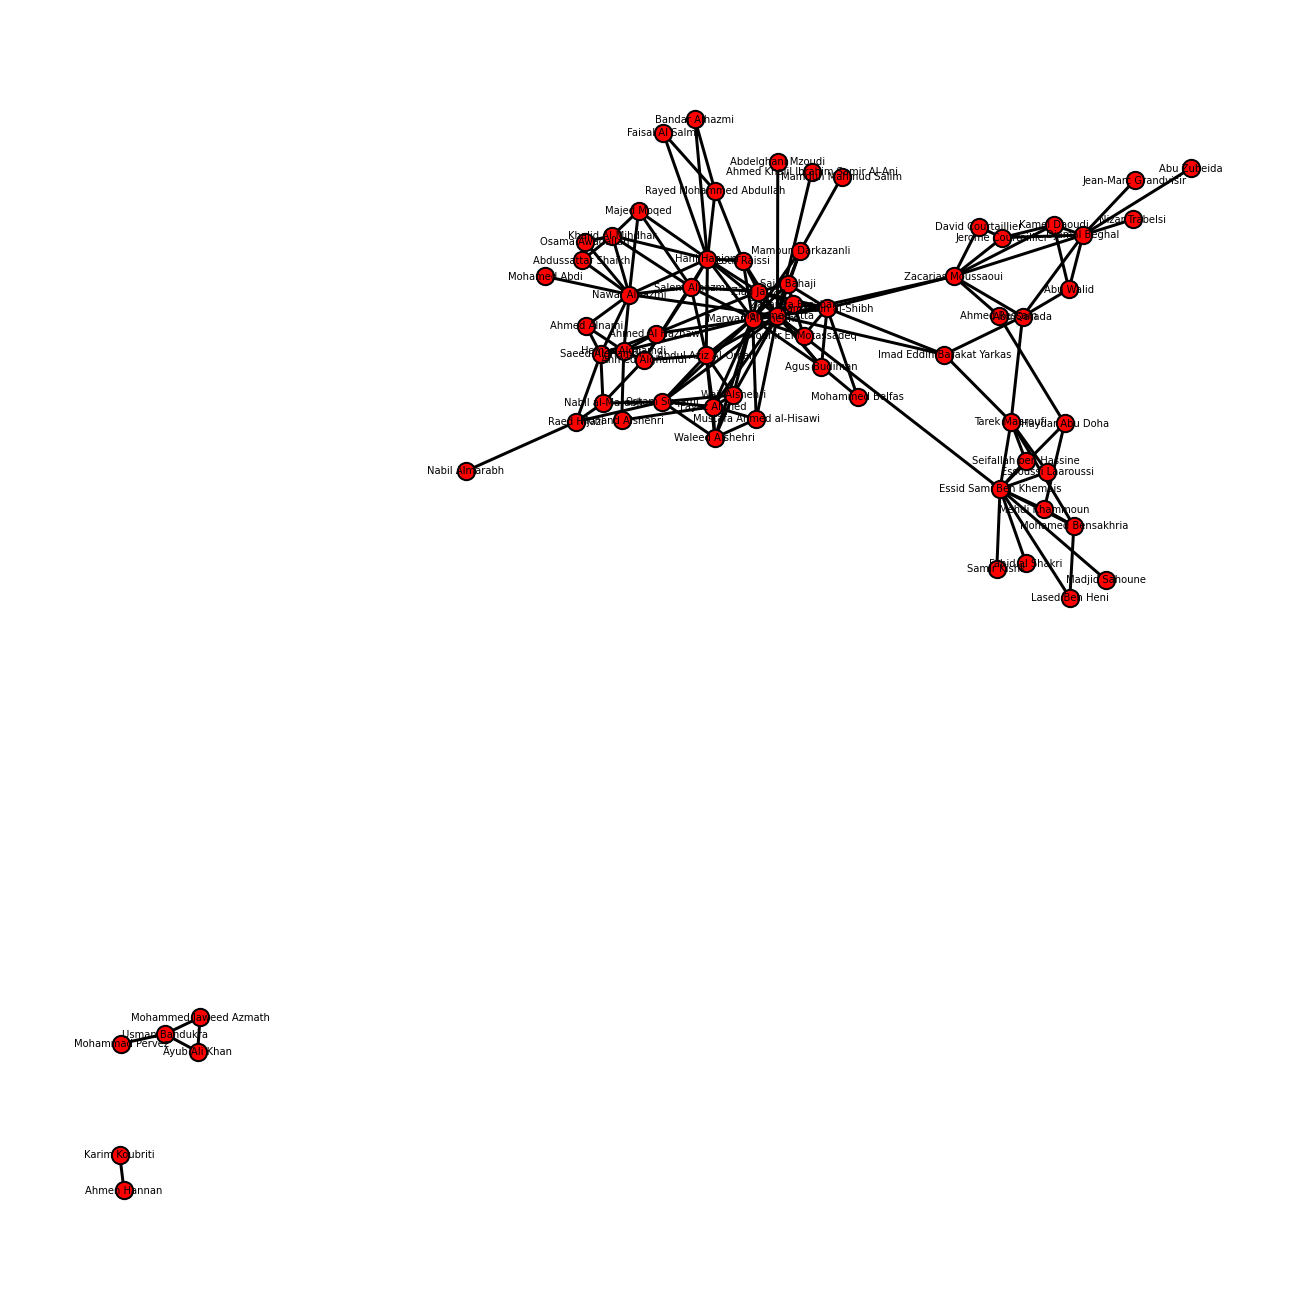

In [14]:
layout = nx.spring_layout(g)
plt.figure(figsize=(18,18))
nx.draw(g, layout, with_labels = True, **options)

### T6. Indentify communities with `girvan_newman` method. Feel free to try other community detection methods (see [here](https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community)]

In [15]:
from networkx.algorithms.community.centrality import girvan_newman

communities = girvan_newman(g)

In [16]:
node_groups = []
for com in next(communities):
  node_groups.append(list(com))

In [17]:
print(f"Num of communities = {len(node_groups)}")

Num of communities = 4


### T7. Visualize the communities

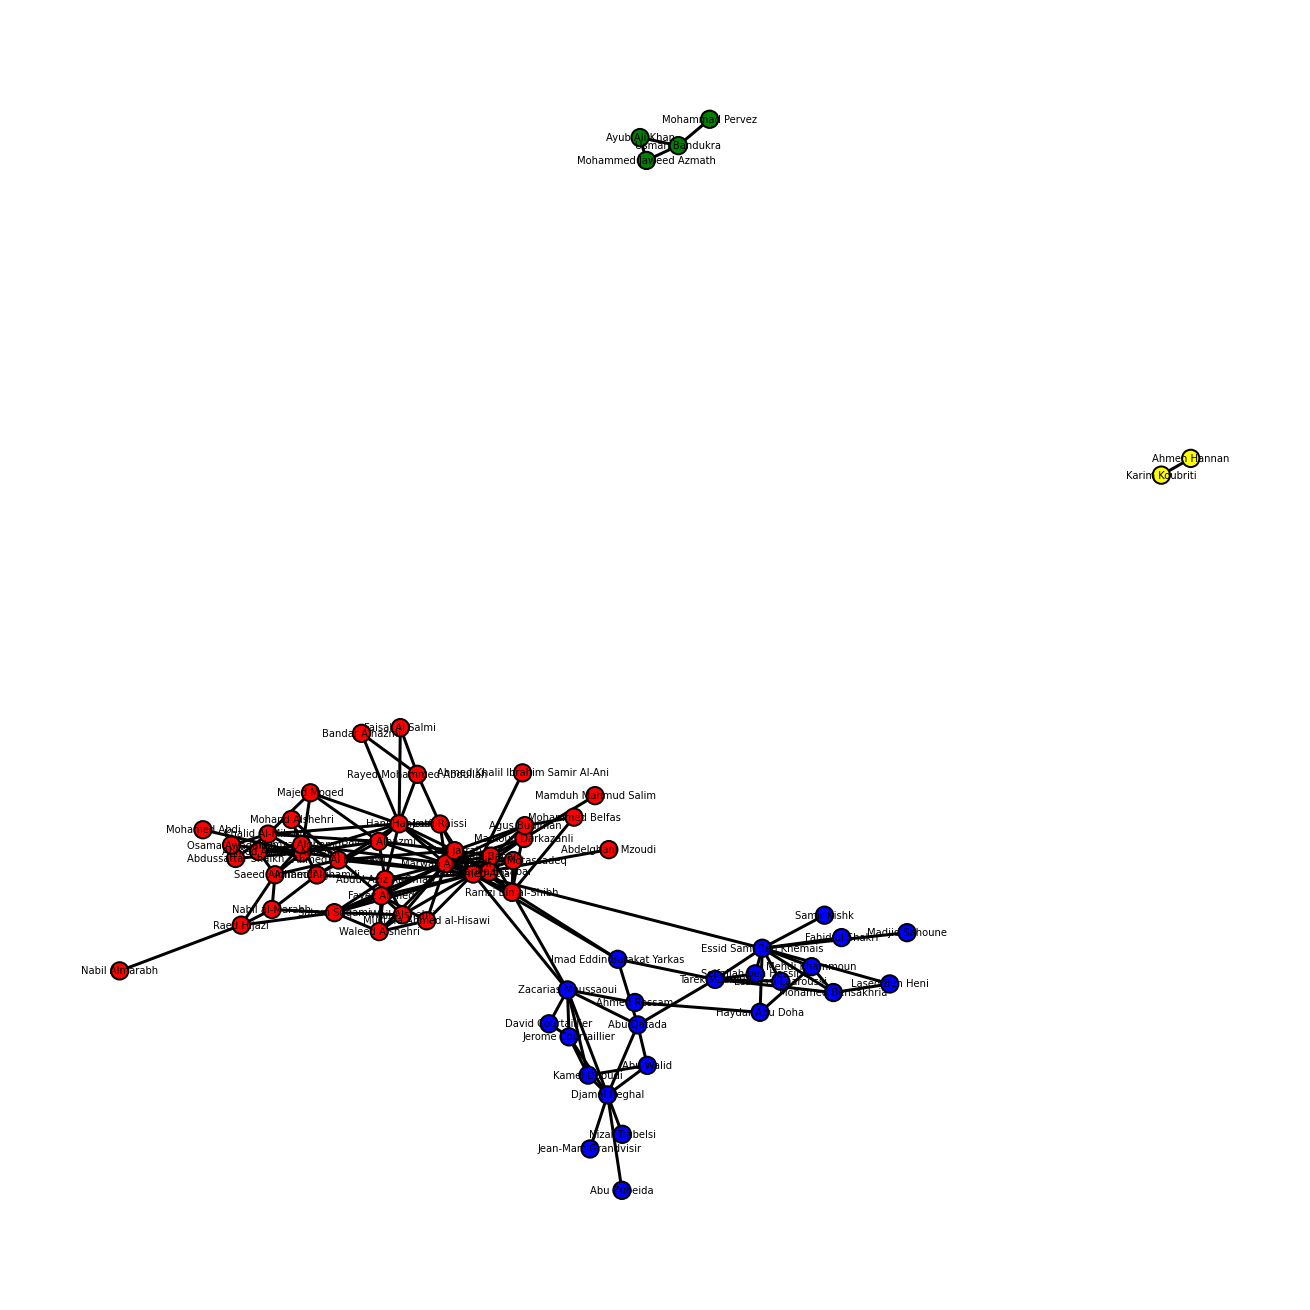

In [18]:
color_map = []
for node in g:
    if node in node_groups[0]:
        color_map.append('red')
    elif node in node_groups[1]:
        color_map.append('blue')
    elif node in node_groups[2]:
        color_map.append('green')
    elif node in node_groups[3]:
        color_map.append('yellow')
    else: 
        color_map.append('black')  
        

options = {
    "font_size": 10,
    "node_size": 300,
    "edgecolors": "black",
    "linewidths": 2,
    "width": 3,
}

plt.figure(figsize=(18,18))
layout = nx.spring_layout(g)
nx.draw(g, layout, node_color=color_map, with_labels=True, **options)